In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import zscore

In [4]:
cwd = os.getcwd()
df = pd.read_csv(f"{cwd}/7-29_acc_df.csv")
umap_pca_algs = ['pca','$\\alpha = $0.25','$\\alpha = $0.5','$\\alpha = $0.75','umap']
up_df = df[df['algorithm'].isin(umap_pca_algs)]
x_map = {'pca': 0, '$\\alpha = $0.25': 0.25, '$\\alpha = $0.5': 0.5, '$\\alpha = $0.75': 0.75, 'umap': 1}
inv_x_map = {v: k for k, v in x_map.items()}
x = np.linspace(0,1,5)

rt Mean: 0.7555 std: 0.0428
centr Mean: 0.7817 std: 0.0723
knn Mean: 0.7995 std: 0.0888


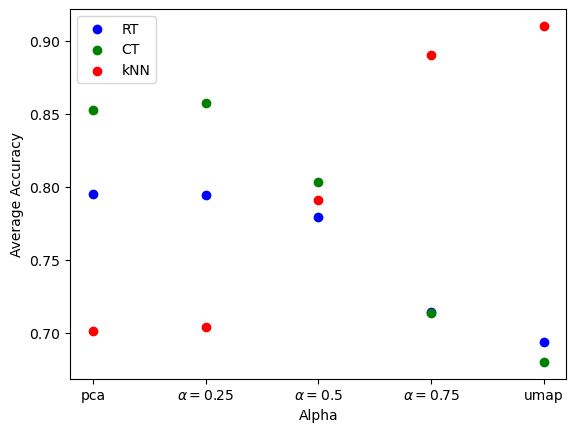

In [12]:
plt.figure()
metrics = ['rt', 'centr', 'knn']
color_map = {'rt': 'blue', 'centr':'green', 'knn':'red'}
label_map = {'rt': 'RT', 'centr':'CT', 'knn': 'kNN'}
metric_df = None
for metric in metrics:
    metric_df = up_df.groupby('algorithm')[metric].mean()# avg of metric
    # misnomer, this is a series    
    y = []
    for x_val in x:
        key = inv_x_map[x_val]
        y_val = metric_df[key]
        y.append(y_val)
    y = np.array(y)
    mu, std = norm.fit(y)
    print(metric, "Mean:", np.round(mu,4), "std:", np.round(std,4))
    plt.scatter(x, y, color=color_map[metric], label= label_map[metric])
plt.xticks(x, x_map.keys())
plt.xlabel('Alpha')  
plt.ylabel('Average Accuracy')
plt.legend()
plt.show()

In [19]:
# Corinne 8-7
# compute RT-zOGF from baseline methods
baseline_df = df[df['algorithm'].isin(['pca', 'tsne', 'pacmap', 'umap'])]
zdf = df # store z scores here
metrics = ['rt', 'centr', 'knn']
for metric in metrics:
    metric_df = baseline_df[metric] 
    mu = metric_df.mean()
    sigma = metric_df.std()
    
    metric_zscores = (df[metric] - mu) / sigma # compute z-scores across all methods
    zdf[metric] = metric_zscores

zdf['ogf'] = 0.5*zdf['rt'] + 0.5*zdf['knn'] # compute RT-zOGF

zdf

,dataset,algorithm,rt,centr,knn,ogf
0,CAFs,pca,0.754539,0.325475,0.467387,0.866480
1,CellMix,pca,1.154458,0.993271,0.654901,0.925344
2,Duo4eq,pca,0.746896,1.327168,-1.979831,0.744959
3,Duo8eq,pca,0.723614,1.271519,-1.887038,0.748391
4,FMNIST,pca,1.989796,1.281637,-2.283100,0.718608
...,...,...,...,...,...,...
65,Kang,$\alpha = $0.75,-0.094062,-1.439246,0.553536,0.755656
66,MNIST,$\alpha = $0.75,-1.902912,0.408950,0.653971,0.886384
67,Muraro,$\alpha = $0.75,-1.347442,-1.284389,0.658241,0.774014
68,TMLung,$\alpha = $0.75,0.137883,-0.747767,0.487032,0.796563


In [24]:
zdf.to_csv(f"{cwd}/8-7_RT-zOGF_df.csv", index=False)

In [25]:
datasets = ['CAFs', 'CellMix', 'Duo4eq', 'Duo8eq','FMNIST','Kang','MNIST','Muraro','TMLung','TMPanc']
for d in datasets:
    tab = df[zdf['dataset'] == d]

    # Identify max values
    max_rt = tab['rt'].max()
    max_centr = tab['centr'].max()
    max_knn = tab['knn'].max()
    max_ogf = tab['ogf'].max()

    # Format values: bold max ones
    latex_rows = []
    for _, row in tab.iterrows():
        rt_val = f"\\textbf{{{row['rt']:.4f}}}" if row['rt'] == max_rt else f"{row['rt']:.4f}"
        centr_val = f"\\textbf{{{row['centr']:.4f}}}" if row['centr'] == max_centr else f"{row['centr']:.4f}"
        knn_val = f"\\textbf{{{row['knn']:.4f}}}" if row['knn'] == max_knn else f"{row['knn']:.4f}"
        ogf_val = f"\\cellcolor{{hilite}}{row['ogf']:.4f}" if row['ogf'] == max_ogf else f"{row['ogf']:.4f}"
        latex_rows.append(f"& {row['algorithm']} & {rt_val} & {centr_val} & {knn_val} & {ogf_val} \\\\")

    # Combine into LaTeX tabular
    latex_table = "\\begin{tabular}{lccccc}\n \\textbf{{\\large " + d + "}} & Algorithm & RT & CT & kNN & OGF \\\\\n\\hline\n" + \
                "\n".join(latex_rows) + \
                "\n\\end{tabular}\\\\~\\\\"

    print(latex_table, '\n')

\begin{tabular}{lccccc}
 \textbf{{\large CAFs}} & Algorithm & RT & CT & kNN & OGF \\
\hline
& pca & 0.7545 & 0.3255 & 0.4674 & 0.6110 \\
& tsne & 0.5611 & \textbf{1.8280} & 0.8397 & 0.7004 \\
& umap & 0.5531 & 0.8263 & \textbf{0.8851} & 0.7191 \\
& pacmap & \textbf{0.7943} & 0.8263 & 0.8488 & 0.8215 \\
& $\alpha = $0.25 & 0.7245 & 0.8263 & 0.4946 & 0.6096 \\
& $\alpha = $0.5 & 0.7457 & 0.8263 & 0.6672 & 0.7064 \\
& $\alpha = $0.75 & 0.7669 & 0.8263 & \textbf{0.8851} & \cellcolor{hilite}0.8260 \\
\end{tabular}\\~\\ 

\begin{tabular}{lccccc}
 \textbf{{\large CellMix}} & Algorithm & RT & CT & kNN & OGF \\
\hline
& pca & 1.1545 & \textbf{0.9933} & 0.6549 & \cellcolor{hilite}0.9047 \\
& tsne & 0.0957 & -0.6762 & \textbf{0.9033} & 0.4995 \\
& umap & -0.9533 & -1.5110 & \textbf{0.9033} & -0.0250 \\
& pacmap & 0.8835 & 0.1585 & \textbf{0.9033} & 0.8934 \\
& $\alpha = $0.25 & \textbf{1.1842} & 0.8263 & 0.6005 & 0.8924 \\
& $\alpha = $0.5 & 0.3964 & -0.5093 & 0.8931 & 0.6448 \\
& $\alpha = $0.75